# Import library


In [1]:

# Basic libraries
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Natural Language Processing
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Import data

In [2]:
# r/TheOnion DataFrame
df_onion = pd.read_csv('./data/the_onion.csv')

# r/nottheonion DataFrame
df_not_onion = pd.read_csv('./data/not_onion.csv')

## preview the onion data

In [3]:
# Show first 5 rows of df_onion
print("Shape:", df_onion.shape)
df_onion.head()

Shape: (14868, 8)


,Unnamed: 0,author,domain,num_comments,score,subreddit,timestamp,title
0,0,Kotaay,google.ca,1,1,TheOnion,1554658622,Jack Nicholson Banned From Sitting Courtside A...
1,1,DisastrousCandy3,theonion.com,3,1,TheOnion,1554600149,NicoDerm Introduces New Nicotine Eye Patch
2,2,SlovenianCat,youtu.be,0,1,TheOnion,1554585700,Last Bastion Of U.S. Economy Succumbs To Pancr...
3,3,MyNameIsGriffon,sports.theonion.com,0,386,TheOnion,1554559311,Tom Izzo Calls 2019 Spartans Best Team He’s Ev...
4,4,MyNameIsGriffon,theonion.com,0,3,TheOnion,1554501708,House Democrats Formally Request Trump’s Tax R...


## preview the not the onion data

In [4]:

# Show first 5 rows of df_not_onion
print("Shape:", df_not_onion.shape)
df_not_onion.head()

Shape: (15000, 8)


,Unnamed: 0,author,domain,num_comments,score,subreddit,timestamp,title
0,0,drak0bsidian,cnn.com,0,1,nottheonion,1554663925,Suspected rhino poacher is killed by an elepha...
1,1,somefaces,nypost.com,1,1,nottheonion,1554663648,Taliban commander turns himself in to collect ...
2,2,Sombez,nytimes.com,1,1,nottheonion,1554663558,Rhino Poacher Killed by Elephant and Eaten by ...
3,3,Bayou-Maharaja,ktoo.org,0,1,nottheonion,1554662778,Young shoves female reporter on way to Violenc...
4,4,phantommaster1999,buzz.ie,1,1,nottheonion,1554661988,Poacher hunting rhinos trampled to death by el...


# clean data

In [5]:
def clean_data(dataframe):

    # Drop duplicate rows
    dataframe.drop_duplicates(subset='title', inplace=True)
    
    # Remove punctation
    dataframe['title'] = dataframe['title'].str.replace('[^\w\s]',' ')

    # Remove numbers 
    dataframe['title'] = dataframe['title'].str.replace('[^A-Za-z]',' ')

    # Make sure any double-spaces are single 
    dataframe['title'] = dataframe['title'].str.replace('  ',' ')
    dataframe['title'] = dataframe['title'].str.replace('  ',' ')

    # Transform all text to lowercase
    dataframe['title'] = dataframe['title'].str.lower()
    
    print("New shape:", dataframe.shape)
    return dataframe.head()

In [6]:
# Call `clean_data(dataframe)` function
clean_data(df_onion)

New shape: (14189, 8)


,Unnamed: 0,author,domain,num_comments,score,subreddit,timestamp,title
0,0,Kotaay,google.ca,1,1,TheOnion,1554658622,jack nicholson banned from sitting courtside a...
1,1,DisastrousCandy3,theonion.com,3,1,TheOnion,1554600149,nicoderm introduces new nicotine eye patch
2,2,SlovenianCat,youtu.be,0,1,TheOnion,1554585700,last bastion of u s economy succumbs to pancre...
3,3,MyNameIsGriffon,sports.theonion.com,0,386,TheOnion,1554559311,tom izzo calls spartans best team he s ever t...
4,4,MyNameIsGriffon,theonion.com,0,3,TheOnion,1554501708,house democrats formally request trump s tax r...


In [7]:
# Call `clean_data(dataframe)` function
clean_data(df_not_onion)

New shape: (12086, 8)


,Unnamed: 0,author,domain,num_comments,score,subreddit,timestamp,title
0,0,drak0bsidian,cnn.com,0,1,nottheonion,1554663925,suspected rhino poacher is killed by an elepha...
1,1,somefaces,nypost.com,1,1,nottheonion,1554663648,taliban commander turns himself in to collect ...
2,2,Sombez,nytimes.com,1,1,nottheonion,1554663558,rhino poacher killed by elephant and eaten by ...
3,3,Bayou-Maharaja,ktoo.org,0,1,nottheonion,1554662778,young shoves female reporter on way to violenc...
4,4,phantommaster1999,buzz.ie,1,1,nottheonion,1554661988,poacher hunting rhinos trampled to death by el...


In [8]:
# Create a DataFrame to check nulls
pd.DataFrame([df_onion.isnull().sum(),df_not_onion.isnull().sum()], index=["TheOnion","notheonion"]).T

,TheOnion,notheonion
Unnamed: 0,0,0
author,0,0
domain,0,0
num_comments,0,0
score,0,0
subreddit,0,0
timestamp,0,0
title,0,0


# Natural Language Processing (NLP)

## Concatenate DataFrames

In [9]:
# Combine df_onion & df_not_onion with only 'subreddit' (target) and 'title' (predictor) columns
df = pd.concat([df_onion[['subreddit', 'title']], df_not_onion[['subreddit', 'title']]], axis=0)

#Reset the index
df = df.reset_index(drop=True)

# Preview head of df to show 'TheOnion' titles appear
df.head(2)

,subreddit,title
0,TheOnion,jack nicholson banned from sitting courtside a...
1,TheOnion,nicoderm introduces new nicotine eye patch


In [10]:
# Preview head of df to show 'nottheonion' titles appear
df.tail(2)

,subreddit,title
26273,nottheonion,farming simulator starts up esports with k pri...
26274,nottheonion,mark zuckerberg killed goat with laser gun and...


## Binarize Target subreddit

In [11]:
# Replace `TheOnion` with 1, `nottheonion` with 0
df["subreddit"] = df["subreddit"].map({"nottheonion": 0, "TheOnion": 1})

# Print shape of df
print(df.shape)

# Preview head of df to show 1s
df.head(2)


(26275, 2)


,subreddit,title
0,1,jack nicholson banned from sitting courtside a...
1,1,nicoderm introduces new nicotine eye patch


In [12]:
df.tail(2)

,subreddit,title
26273,0,farming simulator starts up esports with k pri...
26274,0,mark zuckerberg killed goat with laser gun and...


# Apply CountVectorizer()

In [13]:

# Set variables to show TheOnion Titles
mask_on = df['subreddit'] == 1
df_onion_titles = df[mask_on]['title']

# Instantiate a CountVectorizer
cv1 = CountVectorizer(stop_words = 'english')

# Fit and transform the vectorizer on our corpus
onion_cvec = cv1.fit_transform(df_onion_titles)

# Convert onion_cvec into a DataFrame
onion_cvec_df = pd.DataFrame(onion_cvec.toarray(),
                   columns=cv1.get_feature_names())

# Inspect head of Onion Titles cvec
print(onion_cvec_df.shape)

(14189, 11906)


## Count Vectorize df where subreddit is 0¶

In [14]:
# Set variables to show NotTheOnion Titles
mask_no = df['subreddit'] == 0
df_not_onion_titles = df[mask_no]['title']

# Instantiate a CountVectorizer
cv2 = CountVectorizer(stop_words = 'english')

# Fit and transform the vectorizer on our corpus
not_onion_cvec = cv2.fit_transform(df_not_onion_titles)

# Convert onion_cvec into a DataFrame
not_onion_cvec_df = pd.DataFrame(not_onion_cvec.toarray(),
                   columns=cv2.get_feature_names())

# Inspect head of Not Onion Titles cvec
print(not_onion_cvec_df.shape)

(12086, 14451)


In [17]:
# Set up variables to contain top 5 most used words in Onion
onion_wc = onion_cvec_df.sum(axis = 0)
onion_top_5 = onion_wc.sort_values(ascending=False).head(5)


# Set up variables to contain top 5 most used words in Onion
nonion_wc = not_onion_cvec_df.sum(axis = 0)
nonion_top_5 = nonion_wc.sort_values(ascending=False).head(5)



In [18]:

# Create list of unique words in top five
not_onion_5_set = set(nonion_top_5.index)
onion_5_set = set(onion_top_5.index)

# Return common words
common_unigrams = onion_5_set.intersection(not_onion_5_set)
common_unigrams

{'man', 'trump'}

In [19]:
# Set variables to show TheOnion Titles
mask = df['subreddit'] == 1
df_onion_titles = df[mask]['title']

# Instantiate a CountVectorizer
cv = CountVectorizer(stop_words = 'english', ngram_range=(2,2))

# Fit and transform the vectorizer on our corpus
onion_cvec = cv.fit_transform(df_onion_titles)

# Convert onion_cvec into a DataFrame
onion_cvec_df = pd.DataFrame(onion_cvec.toarray(),
                   columns=cv.get_feature_names())

# Inspect head of Onion Titles cvec
print(onion_cvec_df.shape)
# Set variables to show NotTheOnion Titles
mask = df['subreddit'] == 0
df_not_onion_titles = df[mask]['title']

# Instantiate a CountVectorizer
cv = CountVectorizer(stop_words = 'english', ngram_range=(2,2))

# Fit and transform the vectorizer on our corpus
not_onion_cvec = cv.fit_transform(df_not_onion_titles)

# Convert onion_cvec into a DataFrame
not_onion_cvec_df = pd.DataFrame(not_onion_cvec.toarray(),
                   columns=cv.get_feature_names())

# Inspect head of Not Onion Titles cvec
print(not_onion_cvec_df.shape)
# Set up variables to contain top 5 most used bigrams in r/TheOnion
onion_wc = onion_cvec_df.sum(axis = 0)
onion_top_5 = onion_wc.sort_values(ascending=False).head(5)


# Set up variables to contain top 5 most used bigrams in r/nottheonion
nonion_wc = not_onion_cvec_df.sum(axis = 0)
nonion_top_5 = nonion_wc.sort_values(ascending=False).head(5)

not_onion_5_list = set(nonion_top_5.index)
onion_5_list = set(onion_top_5.index)

# Return common words
common_bigrams = onion_5_list.intersection(not_onion_5_list)
common_bigrams

(14189, 34896)
(12086, 58973)


{'year old'}

## Create custom stop_words to include common frequent words

In [20]:
# Create lists 
custom = stop_words.ENGLISH_STOP_WORDS
custom = list(custom)
common_unigrams = list(common_unigrams)
common_bigrams = list(common_bigrams)

# Append unigrams to list 
for i in common_unigrams:
    custom.append(i)

    
# Append bigrams to list 
for i in common_bigrams:
    split_words = i.split(" ")
    for word in split_words:
        custom.append(word)

# Modeling

## Baseline

In [21]:
# Baseline score
df['subreddit'].value_counts(normalize=True)

1    0.540019
0    0.459981
Name: subreddit, dtype: float64

## Set X (predictor) and y (target) variables

In [22]:
X = df['title']
y = df['subreddit']

## Train/Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    stratify=y)

In [54]:
y_test


2280     1
9982     1
21126    0
9593     1
20186    0
14118    1
23156    0
19189    0
16158    0
5781     1
4081     1
9025     1
1777     1
25457    0
23768    0
8401     1
1454     1
8140     1
9751     1
25820    0
16922    0
19509    0
16159    0
702      1
17380    0
5558     1
2293     1
9260     1
13037    1
13156    1
        ..
2186     1
24896    0
13909    1
9286     1
25725    0
13857    1
8526     1
21562    0
16592    0
11144    1
20763    0
16064    0
17179    0
24377    0
6412     1
16097    0
21149    0
4866     1
10866    1
1081     1
9404     1
13071    1
24089    0
2070     1
23283    0
3597     1
25105    0
19024    0
1865     1
9490     1
Name: subreddit, Length: 6569, dtype: int64

## Model 1: CountVectorizer & Logistic Regression (Best Coefficient Interpretability)

In [24]:
pipe = Pipeline([('cvec', CountVectorizer()),    
                 ('lr', LogisticRegression(solver='liblinear'))])

# Tune GridSearchCV
pipe_params = {'cvec__stop_words': [None, 'english', custom],
               'cvec__ngram_range': [(1,1), (2,2), (1,3)],
               'lr__C': [0.01, 1]}

gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train);
print("Best score:", gs.best_score_)
print("Train score", gs.score(X_train, y_train))
print("Test score", gs.score(X_test, y_test))

gs.best_params_

Best score: 0.8531411752765655
Train score 0.9618897797625089
Test score 0.8652762977622165


{'cvec__ngram_range': (1, 1), 'cvec__stop_words': None, 'lr__C': 1}

## Model 2: TfidfVectorize & Logistic Regression

In [25]:
pipe = Pipeline([('tvect', TfidfVectorizer()),    
                 ('lr', LogisticRegression(solver='liblinear'))])

# Tune GridSearchCV
pipe_params = {'tvect__max_df': [.75, .98, 1.0],
               'tvect__min_df': [2, 3, 5],
               'tvect__ngram_range': [(1,1), (1,2), (1,3)],
               'lr__C': [1]}

gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train);
print("Best score:", gs.best_score_)
print("Train score", gs.score(X_train, y_train))
print("Test score", gs.score(X_test, y_test))

gs.best_params_

Best score: 0.8438546635542474
Train score 0.911651273723739
Test score 0.8558380270969707


{'lr__C': 1,
 'tvect__max_df': 0.75,
 'tvect__min_df': 3,
 'tvect__ngram_range': (1, 3)}

## Model 3: CountVectorizer & MultinomialNB (Best Accuracy Score)

In [26]:
pipe = Pipeline([('cvec', CountVectorizer()),    
                 ('nb', MultinomialNB())])

# Tune GridSearchCV
pipe_params = {'cvec__ngram_range': [(1,1),(1,3)],
               'nb__alpha': [.36, .6]}

gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train);
print("Best score:", gs.best_score_)
print("Train score", gs.score(X_train, y_train))
print("Test score", gs.score(X_test, y_test))

gs.best_params_

Best score: 0.8878514158124429
Train score 0.9970059880239521
Test score 0.8972446338864363


{'cvec__ngram_range': (1, 3), 'nb__alpha': 0.36}

## TfidfVectorizer & MultinomialNB

In [27]:
pipe = Pipeline([('tvect', TfidfVectorizer()),    
                 ('nb', MultinomialNB())])

# Tune GridSearchCV
pipe_params = {'tvect__max_df': [.75, .98],
               'tvect__min_df': [4, 5],
               'tvect__ngram_range': [(1,2), (1,3)],
               'nb__alpha': [0.1, 1]}

gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5)
gs.fit(X_train, y_train);
print("Best score:", gs.best_score_)
print("Train score", gs.score(X_train, y_train))
print("Test score", gs.score(X_test, y_test))

gs.best_params_

Best score: 0.8603471024053587
Train score 0.9204810717547955
Test score 0.8651240675901963


{'nb__alpha': 0.1,
 'tvect__max_df': 0.75,
 'tvect__min_df': 4,
 'tvect__ngram_range': (1, 2)}

# Best Model

## CountVectorizer & MultinomialNB: Best Score

In [28]:
#Instantiate the classifier and vectorizer
nb = MultinomialNB(alpha = 0.36)
cvec = CountVectorizer(ngram_range= (1, 3))

# Fit and transform the vectorizor
cvec.fit(X_train)

Xcvec_train = cvec.transform(X_train)
Xcvec_test = cvec.transform(X_test)

# Fit the classifier
nb.fit(Xcvec_train,y_train)

# Create the predictions for Y training data
preds = nb.predict(Xcvec_test)

print(nb.score(Xcvec_test, y_test))

0.8972446338864363


## Confusion Matrix

In [29]:
# Create a confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, preds)
cnf_matrix

array([[2701,  321],
       [ 354, 3193]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

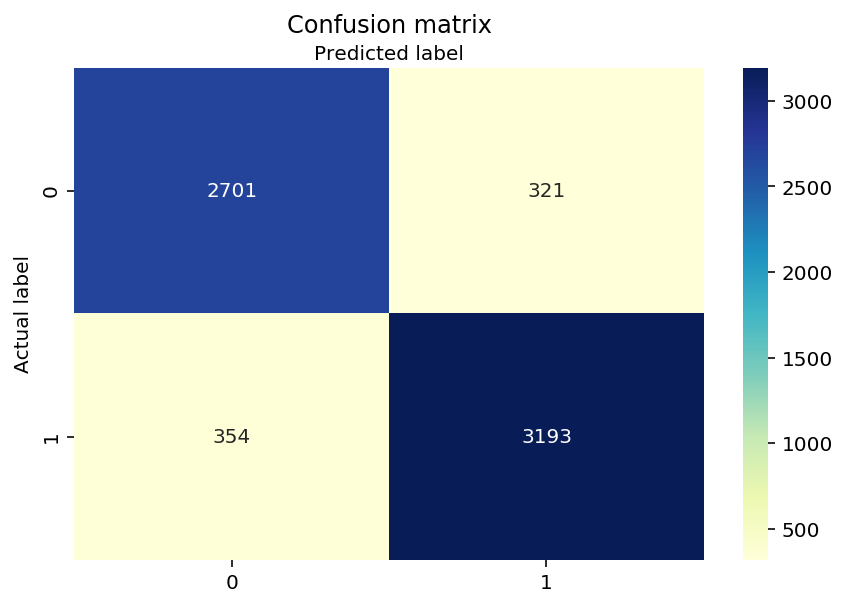

In [30]:
# Code from https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

# name  of classes
class_names=[0,1] 

# Set fig and axes 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
# Assign True Neg, False Pos, False Neg, True Pos variables
cnf_matrix = np.array(cnf_matrix).tolist()

tn_fp, fn_tp = cnf_matrix

tn, fp = tn_fp
fn, tp = fn_tp

In [32]:
# Print Scores 

print("Accuracy:",round(metrics.accuracy_score(y_test, preds)*100, 2),'%')
print("Precision:",round(metrics.precision_score(y_test, preds)*100, 2), '%')
print("Recall:",round(metrics.recall_score(y_test, preds)*100, 2), '%')
print("Specificity:", round((tn/(tn+fp))*100, 2), '%')
print("Misclassification Rate:", round((fp+fn)/(tn+fp+fn+tn)*100, 2), '%')

Accuracy: 89.72 %
Precision: 90.87 %
Recall: 90.02 %
Specificity: 89.38 %
Misclassification Rate: 11.11 %


## CountVectorizer & Logistic Regression: Best Coefficient Interpretability

In [51]:
# Customize stop_words to include `onion` so that it doesn't appear
# in coefficients 

stop_words_onion = stop_words.ENGLISH_STOP_WORDS
stop_words_onion = list(stop_words_onion)
stop_words_onion.append('onion')

#Instantiate the classifier and vectorizer
lr = LogisticRegression(C = 1.0, solver='liblinear')
cvec2 = CountVectorizer(stop_words = stop_words_onion)

# Fit and transform the vectorizor
cvec2.fit(X_train)

Xcvec2_train = cvec2.transform(X_train)
Xcvec2_test = cvec2.transform(X_test)

# Fit the classifier
lr.fit(Xcvec2_train,y_train)

# Create the predictions for Y training data
lr_preds = lr.predict(Xcvec2_test)

print(lr.score(Xcvec2_test, y_test))

0.8552291064088903


## Coefficient Analysis

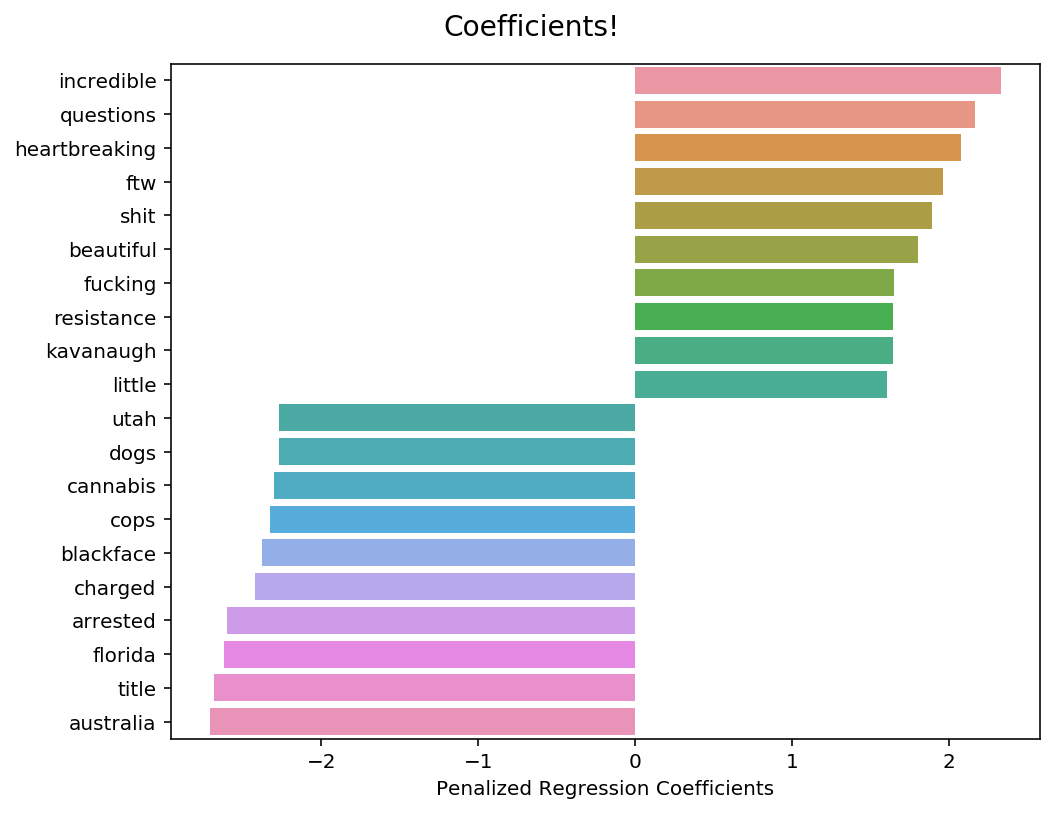

In [44]:
# Create list of logistic regression coefficients 
lr_coef = np.array(lr.coef_).tolist()
lr_coef = lr_coef[0]

# create dataframe from lasso coef
lr_coef = pd.DataFrame(np.round_(lr_coef, decimals=3), 
cvec2.get_feature_names(), columns = ["penalized_regression_coefficients"])

# sort the values from high to low
lr_coef = lr_coef.sort_values(by = 'penalized_regression_coefficients', 
ascending = False)

# Jasmine changing things up here on out! Top half not mine. 
# create best and worst performing lasso coef dataframes
df_head = lr_coef.head(10)
df_tail = lr_coef.tail(10)

# merge back together
df_merged = pd.concat([df_head, df_tail], axis=0)

# plot the sorted dataframe
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
fig.suptitle('Coefficients!', size=14)
ax = sns.barplot(x = 'penalized_regression_coefficients', y= df_merged.index, 
data=df_merged)
ax.set(xlabel='Penalized Regression Coefficients')
plt.tight_layout(pad=3, w_pad=0, h_pad=0);

In [35]:
print("The word that contributes the most positively to being from r/TheOnion is", 
      df_merged.index[0], "followed by", 
      df_merged.index[1], "and",
      df_merged.index[2],".")

print("-----------------------------------")

print("The word that contributes the most positively to being from r/nottheonion is", 
      df_merged.index[-1], "followed by", 
      df_merged.index[-2], "and",
      df_merged.index[-3],".")

The word that contributes the most positively to being from r/TheOnion is incredible followed by questions and heartbreaking .
-----------------------------------
The word that contributes the most positively to being from r/nottheonion is australia followed by title and florida .


In [36]:
# Show coefficients that affect r/TheOnion
df_merged_head = df_merged.head(10)
exp = df_merged_head['penalized_regression_coefficients'].apply(lambda x: np.exp(x))
df_merged_head.insert(1, 'exp', exp)
df_merged_head.sort_values('exp', ascending=False)

,penalized_regression_coefficients,exp
incredible,2.334,10.319136
questions,2.166,8.723321
heartbreaking,2.079,7.996468
ftw,1.962,7.113540
shit,1.894,6.645899
beautiful,1.805,6.079971
fucking,1.651,5.212189
resistance,1.649,5.201775
kavanaugh,1.646,5.186194
little,1.606,4.982840


In [37]:
print("As occurences of", df_merged_head.index[0], "increase by 1 in a title, that title is", 
      round(df_merged_head['exp'][0],2), "times as likely to be classified as r/TheOnion.")

As occurences of incredible increase by 1 in a title, that title is 10.32 times as likely to be classified as r/TheOnion.


In [38]:
# Show coefficients that affect r/nottheonion
df_merged_tail = df_merged.tail(10)
exp = df_merged_tail['penalized_regression_coefficients'].apply(lambda x: np.exp(x * -1))
df_merged_tail.insert(1, 'exp', exp)
df_merged_tail.sort_values('exp', ascending=False)

,penalized_regression_coefficients,exp
australia,-2.710,15.029276
title,-2.686,14.672867
florida,-2.621,13.749466
arrested,-2.604,13.517701
charged,-2.426,11.313537
blackface,-2.381,10.815713
cops,-2.327,10.247154
cannabis,-2.303,10.004150
utah,-2.274,9.718196
dogs,-2.274,9.718196


In [39]:
print("As occurences of", df_merged_tail.index[-1], "increase by 1 in a title, that title is", 
      round(df_merged_tail['exp'][-1],2), "times as likely to be classified as r/nottheonion.")

As occurences of australia increase by 1 in a title, that title is 15.03 times as likely to be classified as r/nottheonion.
